In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly 
import geopandas as gpd

In [2]:
autism_cdc_2003=pd.read_sas("../CDC/DS0001/04691-0001-Data.xpt")

In [3]:
autism_cdc_2003.head()

,IDNUMR,STATE,MSA_STAT,AGEYR_CH,TOTKIDS4,AGEPOS4,S1Q01,RELATION,TOTADULT,EDUCATIO,...,S11Q04,S11Q05,S11Q06R,S11Q08,POVERTY,C11Q11,C11Q11A,C11Q11B,S9Q34,WEIGHT_I
0,101209.0,36.0,5.397605e-79,11.0,2.0,3.0,1.0,2.0,3.0,3.0,...,1.0,1.0,8.000000e+00,1.0,4.0,5.397605e-79,5.397605e-79,1.0,2.0,579.89
1,15132.0,2.0,1.000000e+00,2.0,1.0,1.0,1.0,1.0,2.0,3.0,...,1.0,1.0,1.000000e+00,1.0,6.0,5.397605e-79,5.397605e-79,-1.0,2.0,469.65
2,79179.0,15.0,1.000000e+00,6.0,2.0,2.0,2.0,2.0,2.0,3.0,...,1.0,1.0,1.000000e+00,1.0,8.0,-1.000000e+00,-1.000000e+00,-1.0,-1.0,1458.67
3,51948.0,46.0,1.000000e+00,3.0,1.0,1.0,2.0,3.0,2.0,2.0,...,-1.0,1.0,5.397605e-79,1.0,8.0,-1.000000e+00,-1.000000e+00,-1.0,-1.0,413.28
4,84608.0,49.0,1.000000e+00,6.0,1.0,1.0,2.0,2.0,2.0,3.0,...,1.0,1.0,1.000000e+00,1.0,8.0,-1.000000e+00,-1.000000e+00,-1.0,-1.0,174.59


In [4]:
autism_cdc_2003.columns.tolist()

['IDNUMR',
 'STATE',
 'MSA_STAT',
 'AGEYR_CH',
 'TOTKIDS4',
 'AGEPOS4',
 'S1Q01',
 'RELATION',
 'TOTADULT',
 'EDUCATIO',
 'PLANGUAG',
 'S2Q01',
 'S2Q02R',
 'HGHT_FLG',
 'S2Q03R',
 'WGHT_FLG',
 'BMICLASS',
 'S2Q04',
 'S2Q05',
 'S2Q06',
 'S2Q07',
 'S2Q08',
 'S2Q09',
 'S2Q10',
 'S2Q11',
 'S2Q12',
 'S2Q13',
 'S2Q14',
 'S2Q15',
 'S2Q16',
 'S2Q17',
 'S2Q18',
 'S2Q19',
 'S2Q20',
 'S2Q21',
 'S2Q22',
 'S2Q23',
 'S2Q24',
 'S2Q26',
 'S2Q35',
 'S2Q37',
 'S2Q38',
 'S2Q39',
 'S2Q40',
 'S2Q41',
 'S2Q42',
 'S2Q44',
 'S2Q47',
 'S2Q49',
 'S2Q50',
 'S2Q51',
 'S2Q52',
 'S2Q52A',
 'S2Q53',
 'S2Q54',
 'S2Q55X01',
 'S2Q55X02',
 'S2Q55X03',
 'S2Q55X04',
 'S2Q55X05',
 'S2Q55X06',
 'S2Q55X07',
 'S2Q55X08',
 'S2Q55X09',
 'S2Q55X10',
 'S2Q55X11',
 'S2Q55X12',
 'S2Q56',
 'S2Q59',
 'S2Q60',
 'S2Q61',
 'S2Q62',
 'S3Q01',
 'S3Q02',
 'S3Q04',
 'S3Q05',
 'S3Q03',
 'S4Q01',
 'S4Q02',
 'S4Q03R',
 'S4Q04R',
 'S4Q04A',
 'S4Q05R',
 'S4Q06R',
 'S4Q07',
 'S4Q08X01',
 'S4Q08X02',
 'S4Q08X03',
 'S4Q08X04',
 'S4Q08X05',
 'S4Q08X

In [5]:
autism_only_2003=autism_cdc_2003[(autism_cdc_2003["S2Q35"]==1)]
autism_only_2003.head()

,IDNUMR,STATE,MSA_STAT,AGEYR_CH,TOTKIDS4,AGEPOS4,S1Q01,RELATION,TOTADULT,EDUCATIO,...,S11Q04,S11Q05,S11Q06R,S11Q08,POVERTY,C11Q11,C11Q11A,C11Q11B,S9Q34,WEIGHT_I
249,34819.0,37.0,5.397605e-79,7.0,2.0,2.0,2.0,3.0,3.0,2.0,...,-1.0,1.0,5.397605e-79,1.0,6.0,5.397605e-79,5.397605e-79,1.0,2.0,534.17
306,29583.0,42.0,-2.000000e+00,8.0,2.0,2.0,2.0,1.0,2.0,3.0,...,1.0,1.0,5.000000e+00,1.0,2.0,5.397605e-79,5.397605e-79,1.0,2.0,91.60
326,59736.0,49.0,1.000000e+00,6.0,2.0,2.0,1.0,1.0,2.0,3.0,...,1.0,1.0,3.000000e+00,1.0,8.0,-1.000000e+00,-1.000000e+00,-1.0,-1.0,624.28
1213,93158.0,25.0,1.000000e+00,17.0,1.0,1.0,1.0,1.0,2.0,3.0,...,1.0,1.0,4.000000e+00,1.0,7.0,-1.000000e+00,-1.000000e+00,-1.0,-1.0,349.90
1241,10139.0,51.0,-2.000000e+00,7.0,2.0,3.0,1.0,1.0,2.0,3.0,...,1.0,1.0,5.397605e-79,1.0,8.0,-1.000000e+00,-1.000000e+00,-1.0,-1.0,30.27


In [7]:
fips_only=pd.DataFrame(autism_cdc_2003["STATE"].apply(lambda x: str(round(x))))
fips_only.head()

,STATE
0,36
1,2
2,15
3,46
4,49


In [9]:
autism_only_2003.rename(columns={"STATE":"FIPS"},inplace=True)
autism_only_2003.head()

,IDNUMR,FIPS,MSA_STAT,AGEYR_CH,TOTKIDS4,AGEPOS4,S1Q01,RELATION,TOTADULT,EDUCATIO,...,S11Q04,S11Q05,S11Q06R,S11Q08,POVERTY,C11Q11,C11Q11A,C11Q11B,S9Q34,WEIGHT_I
249,34819.0,37.0,5.397605e-79,7.0,2.0,2.0,2.0,3.0,3.0,2.0,...,-1.0,1.0,5.397605e-79,1.0,6.0,5.397605e-79,5.397605e-79,1.0,2.0,534.17
306,29583.0,42.0,-2.000000e+00,8.0,2.0,2.0,2.0,1.0,2.0,3.0,...,1.0,1.0,5.000000e+00,1.0,2.0,5.397605e-79,5.397605e-79,1.0,2.0,91.60
326,59736.0,49.0,1.000000e+00,6.0,2.0,2.0,1.0,1.0,2.0,3.0,...,1.0,1.0,3.000000e+00,1.0,8.0,-1.000000e+00,-1.000000e+00,-1.0,-1.0,624.28
1213,93158.0,25.0,1.000000e+00,17.0,1.0,1.0,1.0,1.0,2.0,3.0,...,1.0,1.0,4.000000e+00,1.0,7.0,-1.000000e+00,-1.000000e+00,-1.0,-1.0,349.90
1241,10139.0,51.0,-2.000000e+00,7.0,2.0,3.0,1.0,1.0,2.0,3.0,...,1.0,1.0,5.397605e-79,1.0,8.0,-1.000000e+00,-1.000000e+00,-1.0,-1.0,30.27


In [12]:
autism_only_2003["FIPS"]=fips_only
autism_only_2003.head()
autism_only_2003.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 249 to 102216
Columns: 301 entries, IDNUMR to WEIGHT_I
dtypes: float64(300), object(1)
memory usage: 1.1+ MB


/Users/catalinacespedes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [11]:
fp="States 21basic/geo_export_d0f8ce85-b142-405a-a64d-dd3928ba0f98.shp"
map_df=gpd.read_file(fp)
map_df.rename(columns={"state_fips":"FIPS"},inplace=True)

map_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
drawseq       42 non-null float64
state_abbr    51 non-null object
FIPS          51 non-null object
state_name    51 non-null object
sub_region    51 non-null object
geometry      51 non-null object
dtypes: float64(1), object(5)
memory usage: 2.5+ KB


In [14]:
autism_by_state=pd.DataFrame(autism_only_2003.groupby("FIPS")["S2Q35"].count()).rename(columns={"S2Q35": "Autism_Cases"})
autism_by_state.head()


,Autism_Cases
FIPS,
1,8
10,6
11,6
12,6
13,8


In [20]:
autism_by_state.describe()

,Autism_Cases
count,51.000000
mean,9.705882
std,3.596076
min,3.000000
25%,7.000000
50%,9.000000
75%,12.000000
max,18.000000


In [25]:
merged = map_df.join(autism_by_state, on="FIPS",how="outer")
merged["state_name"]


0                   Hawaii
1               Washington
2                  Montana
3                    Maine
4             North Dakota
5             South Dakota
6                  Wyoming
7                Wisconsin
8                  Vermont
9                    Idaho
10               Minnesota
11            Pennsylvania
12                  Oregon
13           New Hampshire
14             Connecticut
15            Rhode Island
16                    Iowa
17           Massachusetts
18                    Utah
19                Nebraska
20                New York
21              New Jersey
22                 Indiana
23                  Nevada
24              California
25                    Ohio
26                Maryland
27                Illinois
28    District of Columbia
29                Delaware
              ...         
32                Kentucky
33                  Kansas
34                Virginia
35                Missouri
36                 Arizona
37                Oklahoma
3

<function matplotlib.pyplot.show(*args, **kw)>

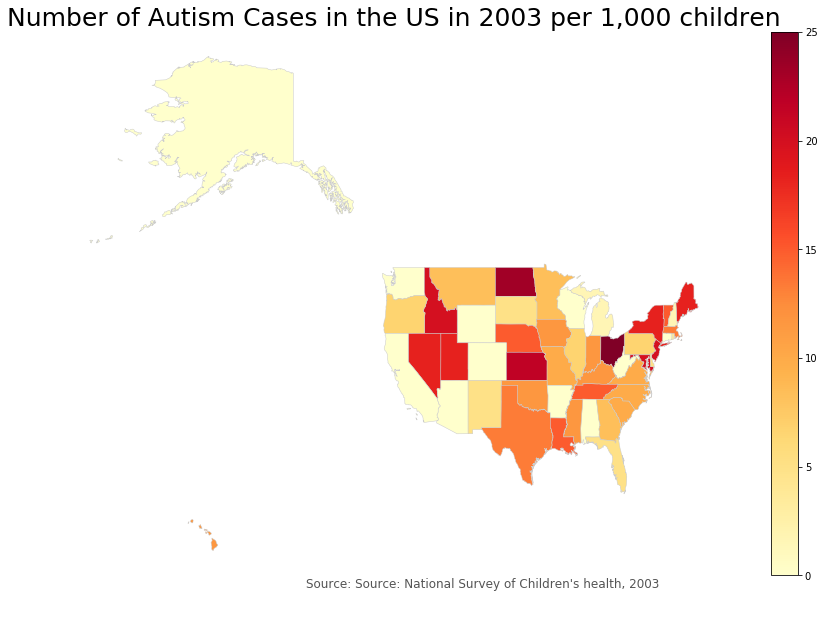

In [33]:
# set a variable  to visualise on the map
variable = "Autism_Cases"
# set the range for the choropleth
vmin, vmax = 0, 25
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))
# create map
merged.plot(cmap="YlOrRd",column=variable, linewidth=0.5, ax=ax, edgecolor="0.8")
# remove the axis
ax.axis("off")
# add a title
ax.set_title("Number of Autism Cases in the US in 2003 per 1,000 children", fontdict={"fontsize": "25", "fontweight" : "4"})
# create an annotation for the data source
ax.annotate("Source: Source: National Survey of Children's health, 2003",xy=(0.8, .08),  xycoords="figure fraction",
            horizontalalignment="right", verticalalignment="top", fontsize=12, color="#555555")
# Create colorbar as a legend
sm = plt.cm.ScalarMappable( cmap="YlOrRd",norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
#Saving figure
plt.savefig("Number of Autism Cases in the US in 2003.png")
plt.show

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].bar(names, values)
fig.suptitle('Categorical Plotting')